In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.optimizers import RMSprop
from matplotlib import pyplot as plt

In [4]:
train_dir = '/Users/varun/Documents/kaggle_dogs_vs_cats/train' 


In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
					train_dir,
					target_size = (150,150),
					batch_size = 50,
					class_mode = 'binary',
					subset = 'training')

validation_generator = train_datagen.flow_from_directory(
						train_dir,
						target_size = (150,150),
						batch_size = 50,
						class_mode = 'binary',
						subset = 'validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
model = tf.keras.Sequential([
							tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(150,150,3)),
							tf.keras.layers.MaxPooling2D(2,2),
							tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
							tf.keras.layers.MaxPooling2D(2,2),
							tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
							tf.keras.layers.MaxPooling2D(2,2),
							tf.keras.layers.Flatten(),
							tf.keras.layers.Dense(512,activation = 'relu'),
							tf.keras.layers.Dense(1,activation = 'sigmoid')])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [9]:
model.compile(optimizer = RMSprop(lr = 0.001),
				loss = 'binary_crossentropy',
				metrics = ['accuracy'])

In [10]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=train_generator.samples//50,
                              epochs=5,
                              validation_steps=validation_generator.samples//50,
                              verbose=1)


Epoch 1/5
400/400 [==============================] - 549s 1s/step - loss: 0.6148 - accuracy: 0.6787 - val_loss: 0.5088 - val_accuracy: 0.7640
Epoch 2/5
400/400 [==============================] - 707s 2s/step - loss: 0.4679 - accuracy: 0.7789 - val_loss: 0.4754 - val_accuracy: 0.7886
Epoch 3/5
400/400 [==============================] - 787s 2s/step - loss: 0.4019 - accuracy: 0.8183 - val_loss: 0.4246 - val_accuracy: 0.8070
Epoch 4/5
400/400 [==============================] - 792s 2s/step - loss: 0.3399 - accuracy: 0.8527 - val_loss: 0.4133 - val_accuracy: 0.8084
Epoch 5/5
400/400 [==============================] - 801s 2s/step - loss: 0.2817 - accuracy: 0.8789 - val_loss: 0.3974 - val_accuracy: 0.8284


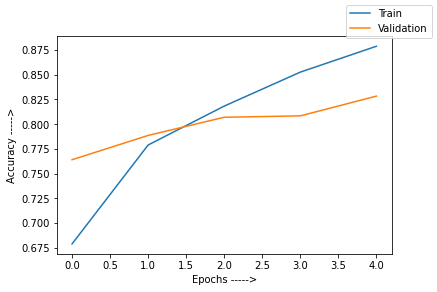

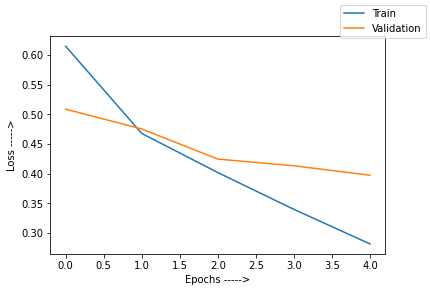

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


ax1 = plt.figure(0)
plt.plot(acc,label = 'Train')
plt.plot(val_acc, label = 'Validation')
plt.xlabel('Epochs ----->')
plt.ylabel('Accuracy ----->')
leg = ax1.legend()


ax2 = plt.figure(1)
plt.plot(loss,label = 'Train')
plt.plot(val_loss,label = 'Validation')
plt.xlabel('Epochs ----->')
plt.ylabel('Loss ----->')
leg = ax2.legend()

In [12]:
import cv2

def predict_model_from_image(i):
    if(model.predict(i)<0.5):
        print("Predicted Image is Cat")
    else:
        print("Predicted Image is Dog")

In [13]:
import numpy as np

I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Dog


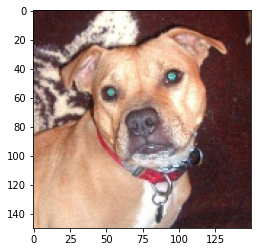

In [15]:
#Test Image out of training and Validation Set

I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/2.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)

IC shape:(150, 150, 3)
x1 shape:(1, 150, 150, 3)
Predicted Image is Cat


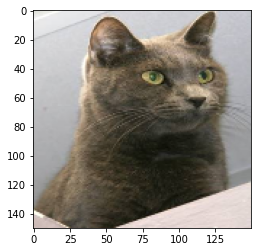

In [16]:
IC = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/11.jpg'),(150,150))

ICCONV = cv2.cvtColor(IC,cv2.COLOR_BGR2RGB)

plt.imshow(ICCONV)

I2 = tf.cast(IC, tf.float32)


x1 = np.expand_dims(I2,axis = 0)

print("IC shape:" + str(I1.shape))
print("x1 shape:" + str(x1.shape))

predict_model_from_image(x1)


I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Dog


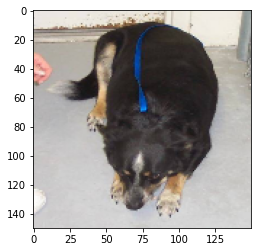

In [18]:
I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/24.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)

I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Dog


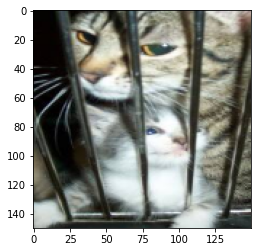

In [19]:
#failed

I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/63.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)

I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Dog


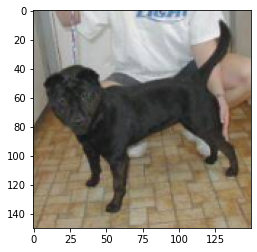

In [22]:
I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/151.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)

I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Dog


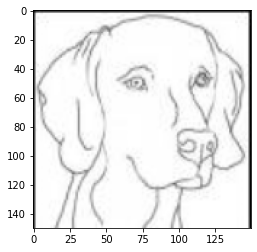

In [23]:
I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/200.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)

I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Dog


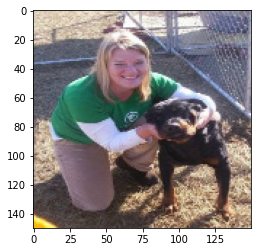

In [24]:
I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/212.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)

I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Dog


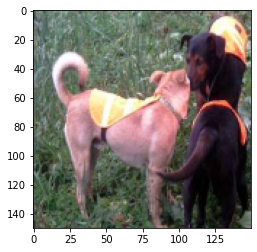

In [25]:
I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/231.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)

I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Cat


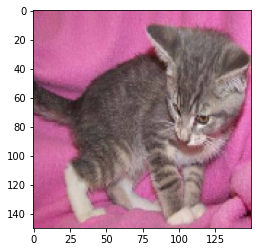

In [26]:
I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/437.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)

I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Dog


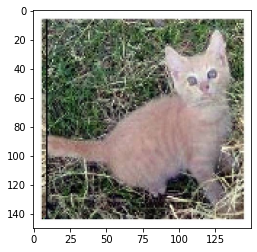

In [27]:
#failed

I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/436.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)

I1 shape:(150, 150, 3)
x shape:(1, 150, 150, 3)
Predicted Image is Cat


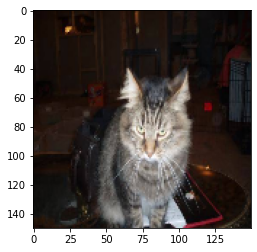

In [28]:
I1 = cv2.resize(cv2.imread('/Users/varun/Documents/kaggle_dogs_vs_cats/test/416.jpg'),(150,150))

I2 = tf.cast(I1, tf.float32)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

plt.imshow(I1)

x = np.expand_dims(I2,axis = 0)

print("I1 shape:" + str(I1.shape))
print("x shape:" + str(x.shape))

predict_model_from_image(x)